# True Stress True Strain

The following program develops the stress-strain curve for use in caluclations when strain hardening characteristics of the stress-strain curve are to be considered.  This follows the methods and procedures in ASME BPVC Section VIII, Division 2, Annex 3-D

The total true strain is:
$$ \epsilon_{t} = \frac{\sigma_{t}}{E_y}+\gamma_{1}+\gamma_{2} $$

where<br>
$\sigma_t = $ true stress at which the true strain will be evaluated<br>
$E_y = $ modulus of elasticity evaluated at the temperature of interest, see Annex 3-E<br>
$\gamma_1 = $ true strain in the micro-strain region of the stress-strain curve
$$\gamma_1 = \frac{\epsilon_1}{2}\left( 1.0-\tanh{\left(H\right)} \right) $$

$\gamma_2 = $ true strain in the macro-strain region of the stress-strain curve
$$\gamma_2 = \frac{\epsilon_2}{2}\left( 1.0+\tanh{\left(H\right)} \right) $$

$\epsilon_1 = $ true plastic strain in the micro-strain region of the stress-strain curve
$$\epsilon_1 = \left( \frac{\sigma_t}{A_1} \right)^{\frac{1}{m_1}} $$
$A_1 = $ curve fitting constant for the elastic region of the stress strain curve
$$A_1 = \frac{\sigma_{ys}\left( 1+\epsilon_{ys} \right)}{\left( \ln \left( 1+\epsilon_{ys} \right) \right)^{m_1}}$$
$m_1 = $ curve fitting exponent for the stress-strain curve equal to the true strain at the proportional limit and the strain hardening coefficient in the large strain region
$$m_1 = \frac{\ln\left(R\right)+\left( \epsilon_p-\epsilon_{ys} \right)}{\ln\left( \frac{\ln\left( 1+\epsilon_p \right)}{\ln\left( 1+\epsilon_{ys} \right)} \right)}$$

$\epsilon_2 = $ true plastic strain in the macro-strain region of the stress-strain curve
$$\epsilon_2 = \left( \frac{\sigma_t}{A_2} \right)^{\frac{1}{m_2}}$$
$A_2 = $ curve fitting constant for the plastic region of the stress strain curve
$$A_2 = \frac{\sigma_{uts}\exp\left( m_2 \right)}{m_2^{m_2}}$$
$m_2 = $ curve fitting exponent for the stress-strain curve equal to the true strain at the true ultimate stress<br>
>For Ferritic Steel:
$$m_2 = 0.60\left( 1.00-R \right)$$
$$\epsilon_p = 2.0E-5$$
For Stainless Steel and Nickel Base Alloys:
$$m_2 = 0.75\left( 1.00-R \right)$$
$$\epsilon_p = 2.0E-5$$
For Duplex Stainless Steel:
$$m_2 = 0.70\left( 0.95-R \right)$$
$$\epsilon_p = 2.0E-5$$

$H = $ stress-strain curve fitting parameter
$$H = \frac{2\left( \sigma_t-\left( \sigma_{ys}+K\left( \sigma_{uts}-\sigma_{ys} \right) \right) \right)}{K\left( \sigma_{uts}-\sigma_{ys} \right)}$$

$R = $ engineering yield to engineering tensile ratio
$$R = \frac{\sigma_{ys}}{\sigma_{uts}} $$
$\epsilon_{ys} = $ 0.2% engineering offset strain
$$\epsilon_{ys} = 0.002$$

$K = $ material parameter for stress-strain curve model
$$K = 1.5R^{1.5}-0.5R^{2.5}-R^{3.5}$$

The development of the stress strain curve should be limited to a value of true ultimate stress at true ultimate tensile strain.  The stress strain curve beyond thus point should be perfectly plastic.  The value of true ultimate tensile stress at true ultimate tensile strain is:
$$\sigma_{uts,t} = \sigma_{uts}\exp\left( m_2 \right)$$

## Coding

##### Code Header

In [1]:
import numpy as np
import matplotlib.pyplot as plt

##### Input Data

In [2]:
material = 'A283 Gr. C'
temp = 'Ambient Temperature'
sigma_ys = 30.0            # Table 1A / Table Y-1
sigma_uts = 55.0           # Table 1A / Table U
epsilon_ys = 0.002         # 
epsilon_p = 2.00E-5        # Table 3-D.1
E_y = 2.95E7               # Table TM-1

##### Calculations

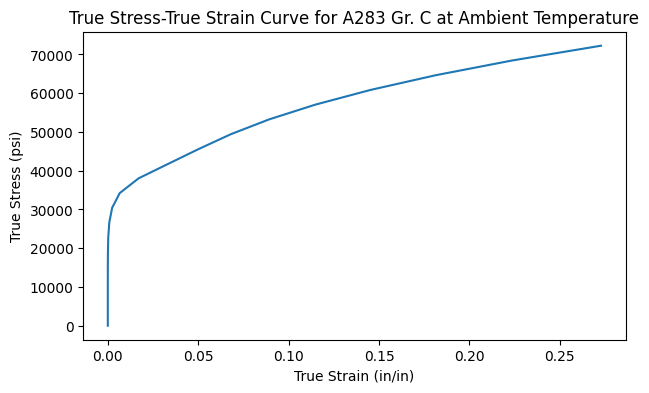

In [3]:
R = sigma_ys / sigma_uts
m2 = 0.6*(1.00-R)           # this equation depends on material Table 3-D.1
sigma_utst = sigma_uts*np.exp(m2)
K = 1.5*R**1.5 - 0.5*R**2.5 - R**3.5
A2 = sigma_uts * np.exp(m2) / m2**m2
m1 = (np.log(R) + (epsilon_p + epsilon_ys)) / (np.log((np.log(1+epsilon_p))/(np.log(1+epsilon_ys))))
A1 = (sigma_ys*(1+epsilon_ys))/(np.log(1+epsilon_ys))**m1

sigma_t = np.linspace(0,sigma_utst,20)

epsilon_1 = (sigma_t / A1)**(1/m1)
epsilon_2 = (sigma_t / A2)**(1/m2)
H = 2 * (sigma_t-(sigma_ys+K*(sigma_uts-sigma_ys))) / (K*(sigma_uts-sigma_ys))
gamma_1 = epsilon_1 / 2 *(1.0 - np.tanh(H))
gamma_2 = epsilon_2 / 2 * (1.0 + np.tanh(H))

epsilon_t = sigma_t/E_y + gamma_1 + gamma_2
sigma_t[0] = 1e-5
curve_data = np.stack((epsilon_t, sigma_t*1000), axis=1)

# Export the data
np.savetxt('tsts_curve.csv', curve_data, delimiter = ',')

# plot the data
plt.figure(figsize=(7,4))
plt.plot(curve_data[:,0], curve_data[:,1])
title = 'True Stress-True Strain Curve for ' + material + ' at ' + temp
plt.title(title)
plt.xlabel('True Strain (in/in)')
plt.ylabel('True Stress (psi)')
plt.show()